In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os

def hist(x, b=100, r=None):
    plt.hist(x, bins=b, range=r, color='black')

def scatter(x, y):
    plt.plot(x, y,
        color='black',
        linestyle='',
        marker='o',
        markersize='2',
        alpha=0.1)
    
def getfid(fname):
    return int(fname.split('_id_')[1].split('.')[0])


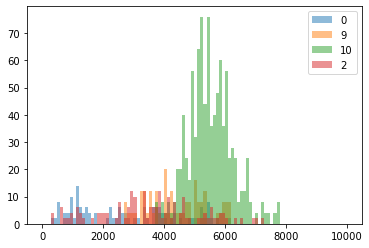

In [31]:
l = pd.read_csv('labels/dmy.csv')
fids = [getfid(x) for x in l.image]
for i in [0, 9, 10, 2]:
# for i in range(12):
    minid = i * 10000
    maxid = (i+1) * 10000 - 1
    from_fid = pd.Series([x >= minid and x <= maxid for x in fids])
    l_fid = l[from_fid]
    plt.hist(l_fid.dmy, bins=100, range=(0, 10000), alpha=0.5, label=i)
plt.legend()
plt.show()

## DMY

In [2]:
l = pd.read_csv('labels/subset1.csv')

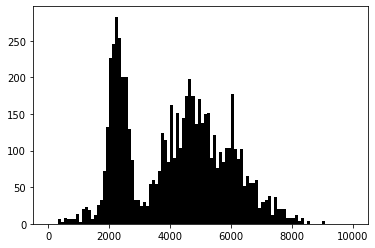

In [125]:
n, bins, _ = plt.hist(l.dmy, bins=100, range=(0,10000), color='black')
plt.show()

In [126]:
n, bins

(array([  0.,   0.,   0.,   6.,   2.,   8.,   6.,   6.,   6.,  14.,   2.,
         20.,  23.,  19.,   6.,  12.,  26.,  32.,  72., 132., 227., 246.,
        283., 254., 200., 200., 129.,  87.,  32.,  32.,  24.,  30.,  24.,
         54.,  60.,  54.,  72., 124., 115.,  85., 162.,  90., 152., 104.,
        144., 174., 198., 174., 136., 170., 138., 150., 152.,  90., 122.,
         76.,  98.,  84., 104., 104., 178., 102.,  88., 102.,  52.,  66.,
         56.,  56.,  60.,  22.,  30.,  32.,  38.,  12.,  36.,  20.,  20.,
         20.,   8.,   8.,   8.,  12.,   4.,   8.,   0.,   4.,   0.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
          800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
         1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
         2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
         3200.,  3300.,  3400.

In [127]:
binmax = min(n[20:40])
n2 = np.zeros(len(n))
images = []
labels = []

l = l.sample(frac=1)

def getbin(x):
    b = 0
    while bins[b+1] < x: b += 1
    return b

for i in range(len(l)):
    binid = getbin(l.iloc[i, 1])
    if n2[binid] < binmax:
        n2[binid] += 1
        images.append(l.iloc[i, 0])
        labels.append(l.iloc[i, 1])

In [128]:
len(labels)

1654

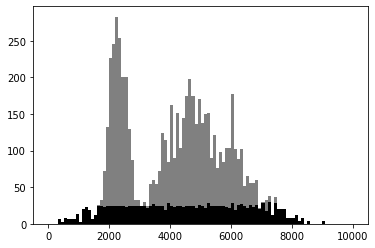

In [130]:
plt.hist(l.dmy, bins=100, range=(0,10000), color='gray')
plt.hist(labels, bins=100, range=(0,10000), color='black')
plt.show()

In [131]:
l2 = pd.DataFrame({'image': images, 'dmy': labels})

In [133]:
l2

,image,dmy
0,jokioinen_second_0754_id_40385.tif,2227
1,jokioinen_first_0976_id_80404.tif,5226
2,jokioinen_second_0223_id_40508.tif,2043
3,isokyrö_third_0864_id_110216.tif,7410
4,jokioinen_second_1080_id_40610.tif,1958
...,...,...
1649,isokyrö_third_0729_id_110183.tif,7534
1650,ylistaro_second_0037_id_70103.tif,3050
1651,rgb_n_0002_id_8.tif,1265
1652,jokioinen_first_0291_id_80341.tif,7377


In [134]:
l2.to_csv('labels/subset1-flattened2.csv', index=False)

In [165]:
d = pd.read_csv('labels/full.csv', sep=';')

In [166]:
not_rg_test_idx = (d['id'] < 30000) | (d['id'] >= 40000)
has_dvalue = d['D-value'].notna()
criteria = not_rg_test_idx & has_dvalue
d = d[criteria]
d

,camp,id,FY,DMY,D-value,iNDF,NDF,WSC,Ncont,NU,OMD,valk,INDF,Nup
0,PG_TR_20170606,1,1022.222222,335.955694,770.0,29.0,437.0,214.0,23.20,7.794172,NaN,NaN,NaN,NaN
1,PG_TR_20170606,2,3040.000000,974.725764,765.0,27.0,439.0,181.0,30.24,29.475707,NaN,NaN,NaN,NaN
2,PG_TR_20170606,3,3743.589744,1014.305955,758.0,31.0,445.0,162.0,32.00,32.457791,NaN,NaN,NaN,NaN
3,PG_TR_20170606,4,4160.000000,1178.858954,770.0,31.0,451.0,137.0,36.00,42.438922,NaN,NaN,NaN,NaN
4,PG_TR_20170606,5,4183.006536,1205.308328,758.0,32.0,452.0,122.0,38.24,46.090990,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,NaN,110236,27167.381970,6330.000000,70.2,NaN,53.8,NaN,NaN,NaN,NaN,14.8,8.3,NaN
1815,NaN,110237,29166.666670,7000.000000,71.3,NaN,53.4,NaN,NaN,NaN,NaN,15.7,8.0,NaN
1816,NaN,110238,24166.007910,6114.000000,69.8,NaN,56.4,NaN,NaN,NaN,NaN,13.0,8.3,NaN
1817,NaN,110239,25333.333330,6764.000000,69.8,NaN,58.3,NaN,NaN,NaN,NaN,11.8,8.9,NaN


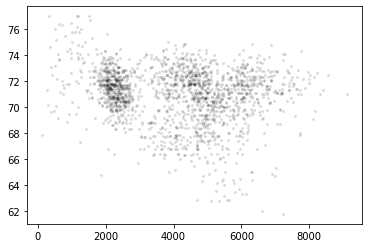

In [174]:
dmy = d['DMY']
dvalue = d['D-value']
dvalue_adjusted = [d/10 if d>100 else d for d in dvalue]
scatter(dmy, dvalue_adjusted)

## D-value

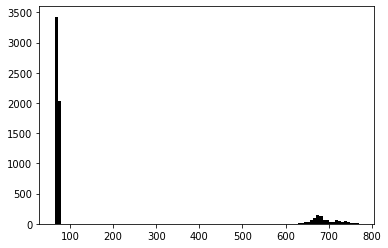

In [123]:
dvalue_df = pd.read_csv('labels/dvalue.csv')
dvalues = dvalue_df['D-value']
hist(dvalues)

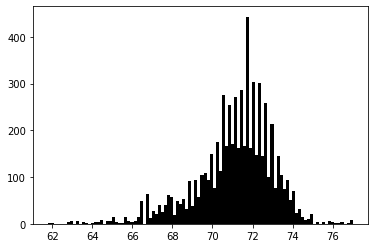

In [124]:
dvalues = [d/10 if d>100 else d for d in dvalues]
hist(dvalues)

In [125]:
dvalue_adjusted_df = dvalue_df.copy()
dvalue_adjusted_df['D-value'] = dvalues
dvalue_adjusted_df.to_csv('labels/dvalue-adjusted.csv', index=False)

## Comparisons

In [182]:
# runs = os.listdir('out/')
# runs = [x for x in runs if len(x.split('-')) > 1]
runs = [
    '33-dvalue',
    '34-dvalue-histeq',
    '39-dvalue-adjusted',
    '40-dvalue-adjusted-histeq',
    '35-dmy',
    '36-dmy-histeq',
    '37-dmy-flat',
    '38-dmy-flat-histeq'
]

nrmses = [pd.read_csv(f'out/{run}/results.csv')['nrmse'].item() for run in runs]
nrmses = [round(100 * nrmse, 3) for nrmse in nrmses]

runs = [run[3:] for run in runs]

table = pd.DataFrame()
table['run'] = runs
table['nrmse (%)'] = nrmses
table

,run,nrmse (%)
0,dvalue,7.883
1,dvalue-histeq,1.669
2,dvalue-adjusted,0.008
3,dvalue-adjusted-histeq,0.011
4,dmy,1.213
5,dmy-histeq,1.169
6,dmy-flat,2.137
7,dmy-flat-histeq,2.109


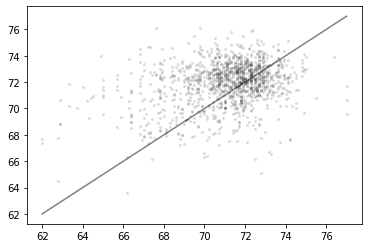

In [183]:
pred = pd.read_csv('out/39-dvalue-adjusted/predictions.csv')
line = [min(pred['label']), max(pred['label'])]
# line = [0, 100]
plt.plot(line, line, color='gray')
scatter(pred['label'], pred['prediction'])

5.996%


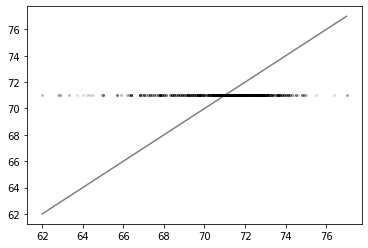

In [190]:
from sklearn.metrics import mean_squared_error
label = pred['label']
mean = label.mean()
guess = [mean for _ in label]
nrmse = mean_squared_error(label, guess)/mean
print(f'{round(nrmse*100, 3)}%')
line = [min(pred['label']), max(pred['label'])]
plt.plot(line, line, color='gray')
scatter(label, guess)